In [1]:
#Importing modules
import torch
import torch.nn as nn
from torchvision import datasets,transforms
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
#Loading data
transform=transforms.ToTensor() #Creating transform function to represent image as tensor
mnist_data=datasets.MNIST(root="./data",transform=transform,download=True,train=True)
loader=torch.utils.data.DataLoader(dataset=mnist_data,batch_size=64,shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 23855876.39it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 2058415.50it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14596462.26it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2689612.98it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
#Creating the Autoencoder
class Autoencoder(nn.Module):
  def __init__(self): #Initialising nn.Module
    super().__init__()
    self.encoder=nn.Sequential(
        nn.Linear(784,128),         #Here we are using fully connected layer
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,12),
        nn.ReLU(),
        nn.Linear(12,3)
    )

    self.decoder=nn.Sequential(
        nn.Linear(3,12),
        nn.ReLU(),
        nn.Linear(12,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,784),
        nn.Sigmoid()
    )

  def forward(self,x): #Defining forward function
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded



In [4]:
class Autoencoder_CNN(nn.Module): #Using a CNN based autoencoder instead of fully connected
  def __init__(self):
    super().__init__()
    self.encoder=nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,stride=2,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=2,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=32,out_channels=64,kernel_size=7)
    )
    #N,64,1,1

    self.decoder=nn.Sequential(
        nn.ConvTranspose2d(in_channels=64,out_channels=32,kernel_size=7),
        nn.ReLU(),
        nn.ConvTranspose2d(in_channels=32,out_channels=16,kernel_size=3,stride=2,padding=1,output_padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(in_channels=16,out_channels=1,kernel_size=3,stride=2,padding=1,output_padding=1),
        nn.Sigmoid()
    )

  def forward(self,x):   #Forward function
    encoded=self.encoder(x)
    decoded=self.decoder(encoded)
    return decoded


In [5]:
model=Autoencoder_CNN()
criteria=nn.MSELoss() #Defining loss function
optimizer=optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-5) #Setting up the optimizer along with parameters


In [6]:
#Training the model
n_epochs=10
output=[]

for epoch in range(n_epochs):
  for id, (img,_) in enumerate(loader):
    recon=model(img)
    loss=criteria(recon,img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'Epoch:{epoch}, Loss:{loss:4f}')
  output.append((epoch,img,recon))

Epoch:0, Loss:0.009112
Epoch:1, Loss:0.005506
Epoch:2, Loss:0.003476
Epoch:3, Loss:0.003296
Epoch:4, Loss:0.003060
Epoch:5, Loss:0.002673
Epoch:6, Loss:0.002464
Epoch:7, Loss:0.002244
Epoch:8, Loss:0.002765
Epoch:9, Loss:0.003152


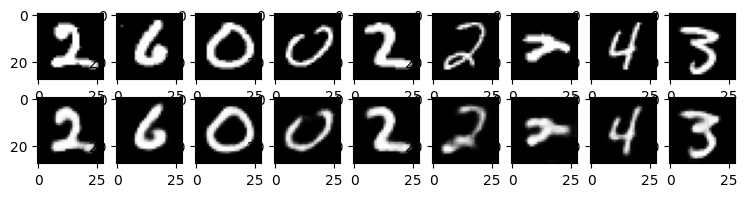

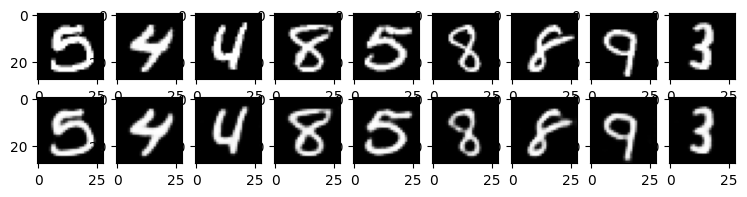

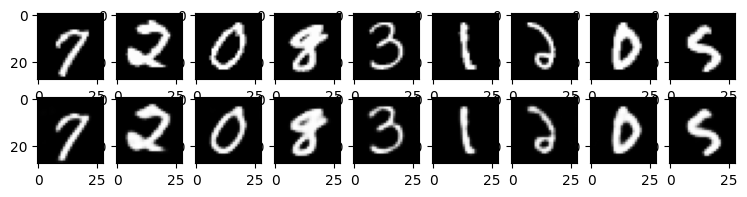

In [7]:
#Displaying input vs output
for k in range(0,n_epochs,4):
  plt.figure(figsize=(9,2))
  plt.gray()

  image=output[k][1].detach().numpy()
  rec=output[k][2].detach().numpy()

  for i,item in enumerate(image):
    if i>=9: break
    plt.subplot(2,9,i+1)
    plt.imshow(item[0])

  for i,item in enumerate(rec):
    if i>=9: break
    plt.subplot(2,9,9+i+1)
    plt.imshow(item[0])